### Column names for dummies

In [21]:
import sqlite3

# Connect to the database
db_path = "../data/data.db"
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

# Query to get column names
cursor.execute("PRAGMA table_info(podcast_episodes)")
columns_info = cursor.fetchall()

# Extract column names
column_names = [col[1] for col in columns_info]

# Display the column names
print("Column Names:", column_names)

# Close the connection
cursor.close()
connection.close()

Column Names: ['transcript', 'rssUrl', 'epTitle', 'epDescription', 'mp3url', 'podTitle', 'lastUpdate', 'itunesAuthor', 'itunesOwnerName', 'explicit', 'imageUrl', 'language', 'createdOn', 'host', 'podDescription', 'category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'oldestEpisodeDate', 'episodeDateLocalized', 'durationSeconds', 'hostPredictedNames', 'numUniqueHosts', 'guestPredictedNames', 'numUniqueGuests', 'neitherPredictedNames', 'numUniqueNeithers', 'mainEpSpeakers', 'numMainSpeakers', 'hostSpeakerLabels', 'guestSpeakerLabels', 'overlapPropTurnCount', 'avgTurnDuration', 'overlapPropDuration', 'totalSpLabels', 'tokens', 'BLM', 'tokens_transcript', 'sentences', 'diarized', 'badDiarization']


In [22]:
import sqlite3

# Connect to the database
db_path = "../data/data.db"
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

# Query to get column names
cursor.execute("PRAGMA table_info(speaker_turns)")
columns_info = cursor.fetchall()

# Extract column names
column_names = [col[1] for col in columns_info]

# Display the column names
print("Column Names:", column_names)

# Close the connection
cursor.close()
connection.close()

Column Names: ['mfcc1_sma3Mean', 'mfcc2_sma3Mean', 'mfcc3_sma3Mean', 'mfcc4_sma3Mean', 'F0semitoneFrom27_5Hz_sma3nzMean', 'F1frequency_sma3nzMean', 'turnText', 'speaker', 'startTime', 'endTime', 'duration', 'mp3url', 'turnCount', 'inferredSpeakerRole', 'inferredSpeakerName', 'predictedClassIndex', 'binaryAction', 'multiAction', 'multiActionLLM']


### BAD EXAMPLE

to-do: try to improve fragmented speaker turns

In [50]:
import pandas as pd
df = pd.read_csv("../data/bad_speaker_turns_example.csv")
df["turnText"] = df["turnText"].fillna("").astype(str)

In [24]:
import sqlite3
from tabulate import tabulate

# Connect to the database
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

query = f'''
SELECT podTitle, epTitle, totalSpLabels, numMainSpeakers, mainEpSpeakers, podDescription, epDescription
FROM podcast_episodes
WHERE mp3url = "https://chtbl.com/track/G42DE4/https://dts.podtrac.com/redirect.mp3/cdn.simplecast.com/audio/dbd31d/dbd31d40-e597-46ab-ae8c-305c440d194c/a00d834b-09fb-4e0e-9536-558132236fed/nm-119-michael-decon_tc.mp3?aid=rss_feed&feed=fzkTzFY_"
'''

cursor.execute(query)

# Fetch all rows from the result
rows = cursor.fetchall()

# Get column names from the table
column_names = [description[0] for description in cursor.description]

# Print the table using tabulate
print(tabulate(rows, headers=column_names, tablefmt="pretty"))

# Close the cursor and the connection
cursor.close()
conn.close()

+-------------------------+---------------------------+---------------+-----------------+------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [47]:
df.head()

,mfcc1_sma3Mean,mfcc2_sma3Mean,mfcc3_sma3Mean,mfcc4_sma3Mean,F0semitoneFrom27_5Hz_sma3nzMean,F1frequency_sma3nzMean,turnText,speaker,startTime,endTime,duration,mp3url,turnCount,inferredSpeakerRole,inferredSpeakerName,predictedClassIndex
0,29.443323,2.191056,-0.515787,-1.080479,15.734092,683.053101,[Music] [Music] The idea,SPEAKER_02,0.000000,0.683333,41.00,https://chtbl.com/track/G42DE4/https://dts.podtrac.com/redirect.mp3/cdn.simplecast.com/audio/dbd31d/dbd31d40-e597-46ab-ae8c-305c440d194c/a00d834b-09fb-4e0e-9536-558132236fed/nm-119-michael-decon_tc.mp3?aid=rss_feed&feed=fzkTzFY_,1,NO_INFERRED_ROLE,NO_INFERRED_SPEAKER,NaN
1,22.094163,2.524928,-0.993555,-9.593185,3.092211,726.254353,for,SPEAKER_02,0.683333,0.688333,0.30,https://chtbl.com/track/G42DE4/https://dts.podtrac.com/redirect.mp3/cdn.simplecast.com/audio/dbd31d/dbd31d40-e597-46ab-ae8c-305c440d194c/a00d834b-09fb-4e0e-9536-558132236fed/nm-119-michael-decon_tc.mp3?aid=rss_feed&feed=fzkTzFY_,2,NO_INFERRED_ROLE,NO_INFERRED_SPEAKER,NaN
2,12.802304,5.129226,-6.618303,-11.544758,0.783188,648.186766,all,SPEAKER_02,0.688333,0.697333,0.54,https://chtbl.com/track/G42DE4/https://dts.podtrac.com/redirect.mp3/cdn.simplecast.com/audio/dbd31d/dbd31d40-e597-46ab-ae8c-305c440d194c/a00d834b-09fb-4e0e-9536-558132236fed/nm-119-michael-decon_tc.mp3?aid=rss_feed&feed=fzkTzFY_,3,NO_INFERRED_ROLE,NO_INFERRED_SPEAKER,NaN
3,29.943765,6.282519,2.623754,-1.608636,13.058075,696.948490,this,SPEAKER_02,0.697333,0.700000,0.16,https://chtbl.com/track/G42DE4/https://dts.podtrac.com/redirect.mp3/cdn.simplecast.com/audio/dbd31d/dbd31d40-e597-46ab-ae8c-305c440d194c/a00d834b-09fb-4e0e-9536-558132236fed/nm-119-michael-decon_tc.mp3?aid=rss_feed&feed=fzkTzFY_,4,NO_INFERRED_ROLE,NO_INFERRED_SPEAKER,NaN
4,20.214113,4.026327,1.215602,-2.605735,4.820311,728.451279,"really came from a dream. Yes,",SPEAKER_02,0.700000,0.748333,2.90,https://chtbl.com/track/G42DE4/https://dts.podtrac.com/redirect.mp3/cdn.simplecast.com/audio/dbd31d/dbd31d40-e597-46ab-ae8c-305c440d194c/a00d834b-09fb-4e0e-9536-558132236fed/nm-119-michael-decon_tc.mp3?aid=rss_feed&feed=fzkTzFY_,5,NO_INFERRED_ROLE,NO_INFERRED_SPEAKER,NaN


In [3]:
df['duration'].describe() # in seconds

count    1306.000000
mean        5.664709
std        12.798447
min         0.000000
25%         0.570000
50%         1.420000
75%         4.530000
max       136.520000
Name: duration, dtype: float64

In [4]:
df['F0semitoneFrom27_5Hz_sma3nzMean'].describe() # pitch

count    1306.000000
mean       12.405573
std         6.561894
min         0.000000
25%         8.079155
50%        12.082066
75%        17.006053
max        33.057828
Name: F0semitoneFrom27_5Hz_sma3nzMean, dtype: float64

In [5]:
# A, B = B, A
def sort_speakers(speaker):
    speakers = speaker.split(', ')
    speakers.sort()
    return ', '.join(speakers)

# Apply the function to the speaker column
df['speaker'] = df['speaker'].apply(sort_speakers)

# Count the occurrences of each unique sorted speaker combination
sorted_speaker_counts = df['speaker'].value_counts()
sorted_speaker_counts

speaker
SPEAKER_02                            350
SPEAKER_00                            344
SPEAKER_00, SPEAKER_02                267
SPEAKER_03                             81
SPEAKER_02, SPEAKER_03                 66
SPEAKER_00, SPEAKER_03                 49
SPEAKER_01, SPEAKER_02                 47
SPEAKER_01                             31
SPEAKER_00, SPEAKER_01                 29
SPEAKER_00, SPEAKER_02, SPEAKER_03     14
SPEAKER_00, SPEAKER_01, SPEAKER_02     14
SPEAKER_00, SPEAKER_02, SPEAKER_04      3
SPEAKER_01, SPEAKER_03                  2
SPEAKER_02, SPEAKER_04                  2
SPEAKER_00, SPEAKER_01, SPEAKER_03      2
SPEAKER_01, SPEAKER_02, SPEAKER_03      2
SPEAKER_04                              1
SPEAKER_00, SPEAKER_01, SPEAKER_04      1
SPEAKER_00, SPEAKER_04                  1
Name: count, dtype: int64

Diarization representation

In [6]:
df.columns

Index(['mfcc1_sma3Mean', 'mfcc2_sma3Mean', 'mfcc3_sma3Mean', 'mfcc4_sma3Mean',
       'F0semitoneFrom27_5Hz_sma3nzMean', 'F1frequency_sma3nzMean', 'turnText',
       'speaker', 'startTime', 'endTime', 'duration', 'mp3url', 'turnCount',
       'inferredSpeakerRole', 'inferredSpeakerName', 'predictedClassIndex'],
      dtype='object')

/local/tmp.3535686/ipykernel_340205/2070725640.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(unique_speakers))


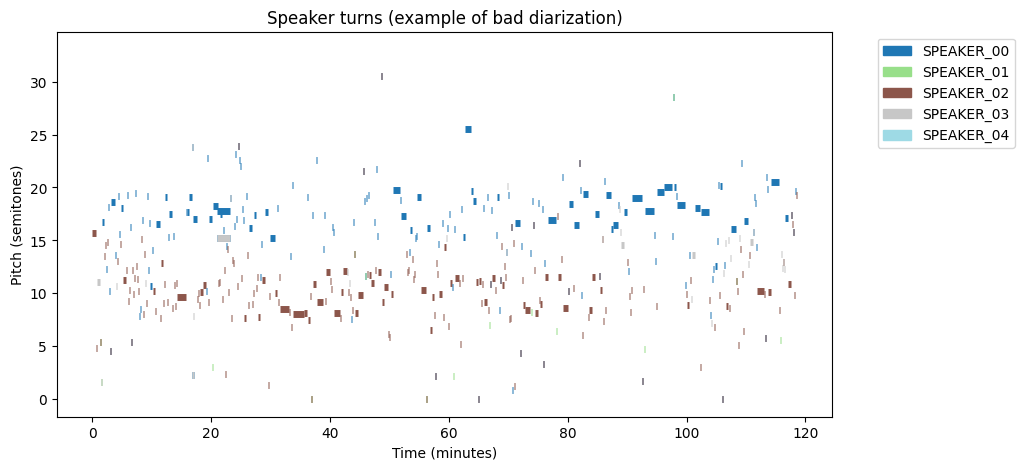

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

# Convert time from seconds to minutes
df["startTime"] /= 60
df["endTime"] /= 60

# Extract and sort unique speakers
unique_speakers = sorted(set(s for s_list in df["speaker"].str.split(", ") for s in s_list))

# Dynamically assign colors
cmap = cm.get_cmap("tab20", len(unique_speakers))
color_map = {speaker: cmap(i) for i, speaker in enumerate(unique_speakers)}

# Create plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each row with correct colors
for _, row in df.iterrows():
    speakers = row["speaker"].split(", ")
    for speaker in speakers:
        ax.hlines(
            y=row["F0semitoneFrom27_5Hz_sma3nzMean"],
            xmin=row["startTime"],
            xmax=row["endTime"],
            colors=color_map[speaker],
            linewidth=5
        )

# Create the legend with alphabetical order
handles = [mpatches.Patch(color=color_map[s], label=s) for s in unique_speakers]
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Pitch (semitones)")
ax.set_title("Speaker turns (example of bad diarization)")

plt.show()

Strategy for putting speaker turns back together: we take mainEpSpeakers for ground truth
1. For turns with multiple speakers, if the first speaker is one of the mainEpSpeakers, we change the list of speakers into the mainEpSpeaker. If the list contains more than one mainEpSpeaker, we take the first mainEpSpeaker in the list. 
2. (Lists with only) hallucinated speakers in between turns of the same mainEpSpeaker should be that mainEpSpeaker.
3. For remaining rows, check percentage of episode left uncovered by the mainEpSpeakers. Set a threshold and do not use the episode in the analysis if the percentage passes the threshold. Small percentages can be categorizes as ads/other and treated as such.

In [51]:
mainEpSpeakers = ["SPEAKER_00", "SPEAKER_02"] # taken from podcast_episodes table in db

In [52]:
# Function to fix speaker turns
def fix_speaker_turns(speakers):
    speaker_list = speakers.split(", ")  # Split by comma and space
    # Check if any of the speakers are in the mainEpSpeakers
    main_speakers_in_turn = [speaker for speaker in speaker_list if speaker in mainEpSpeakers]
    
    if len(main_speakers_in_turn) == 0:
        # If no mainEpSpeakers in the turn, leave the turn as it is
        return speakers
    elif len(main_speakers_in_turn) == 1:
        # If only one mainEpSpeaker is present, return that one
        return main_speakers_in_turn[0]
    else:
        # If more than one mainEpSpeaker is present, return the first one
        return main_speakers_in_turn[0]

# Apply the function to the speaker column
df['speaker'] = df['speaker'].apply(fix_speaker_turns)

In [53]:
speaker_counts = df['speaker'].value_counts()
speaker_counts

speaker
SPEAKER_00                603
SPEAKER_02                588
SPEAKER_03                 81
SPEAKER_01                 31
SPEAKER_01, SPEAKER_03      1
SPEAKER_04                  1
SPEAKER_03, SPEAKER_01      1
Name: count, dtype: int64

For the following rows we can assume it's part of the [speakerTurn-1, speakerTurn+1]:

In [42]:
# filtered_row = df[df['speaker'] == "SPEAKER_01, SPEAKER_03"]
# filtered_row

In [41]:
# filtered_row = df[df['speaker'] == "SPEAKER_03, SPEAKER_01"]
# filtered_row

In [40]:
# filtered_row = df[df['speaker'] == "SPEAKER_04"]
# filtered_row

From manual inspection, speaker 3 is the host (speaker 0). Can't tell about speaker 1.

In [36]:
# pd.set_option('display.max_colwidth', None)

In [38]:
# speaker3_turns = df[df['speaker'] == "SPEAKER_03"]
# speaker3_turns

In [39]:
# speaker1_turns = df[df['speaker'] == "SPEAKER_01"]
# speaker1_turns

In [54]:
# Function to check and update the speaker for rows not assigned to mainEpSpeakers
def update_speaker(df):
    for i in range(1, len(df) - 1):
        # Check if current speaker is not one of the main episode speakers
        if not any(main_speaker in df.loc[i, 'speaker'] for main_speaker in mainEpSpeakers):
            prev_speaker = df.loc[i - 1, 'speaker']
            next_speaker = df.loc[i + 1, 'speaker']
            
            # Check if the previous or next row speaker is a mainEpSpeaker
            prev_speakers = prev_speaker.split(", ") if isinstance(prev_speaker, str) else []
            next_speakers = next_speaker.split(", ") if isinstance(next_speaker, str) else []
            
            # If the previous AND next row is assigned to the same mainEpSpeaker
            # If both previous and next row are assigned to the same mainEpSpeaker
            common_main_speakers = [main_speaker for main_speaker in mainEpSpeakers 
                                    if main_speaker in prev_speakers and main_speaker in next_speakers]
            
            if common_main_speakers:
                # Update current row speaker to the main speaker
                df.loc[i, 'speaker'] = common_main_speakers[0]  # Take the common main speaker
    return df

# Apply the function to update the speaker column
df = update_speaker(df)

In [55]:
speaker_counts = df['speaker'].value_counts()
speaker_counts

speaker
SPEAKER_00                639
SPEAKER_02                632
SPEAKER_03                 24
SPEAKER_01                 10
SPEAKER_03, SPEAKER_01      1
Name: count, dtype: int64

/local/tmp.3550172/ipykernel_3860819/3878644929.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(unique_speakers))


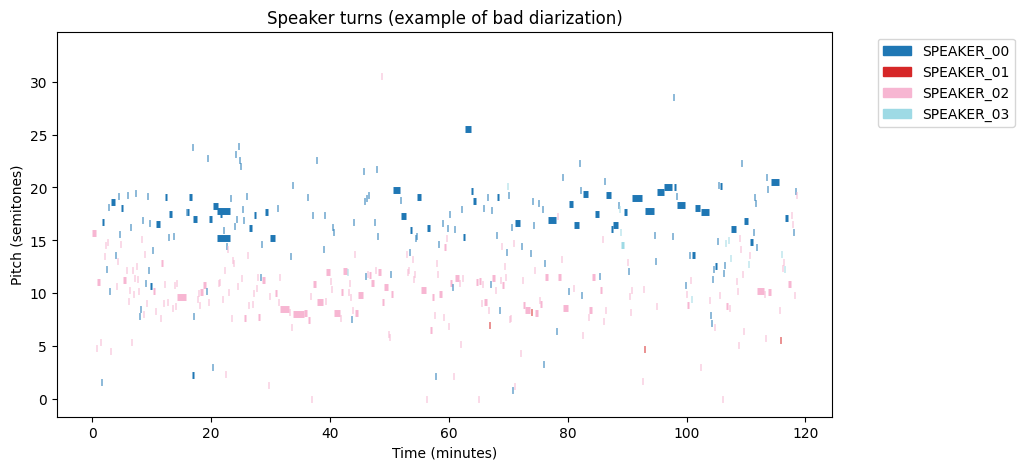

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

# Convert time from seconds to minutes
df["startTime"] /= 60
df["endTime"] /= 60

# Extract and sort unique speakers
unique_speakers = sorted(set(s for s_list in df["speaker"].str.split(", ") for s in s_list))

# Dynamically assign colors
cmap = cm.get_cmap("tab20", len(unique_speakers))
color_map = {speaker: cmap(i) for i, speaker in enumerate(unique_speakers)}

# Create plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each row with correct colors
for _, row in df.iterrows():
    speakers = row["speaker"].split(", ")
    for speaker in speakers:
        ax.hlines(
            y=row["F0semitoneFrom27_5Hz_sma3nzMean"],
            xmin=row["startTime"],
            xmax=row["endTime"],
            colors=color_map[speaker],
            linewidth=5
        )

# Create the legend with alphabetical order
handles = [mpatches.Patch(color=color_map[s], label=s) for s in unique_speakers]
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Pitch (semitones)")
ax.set_title("Speaker turns (example of bad diarization)")

plt.show()

Further investigation as to what Speaker 3 could be:

In [56]:
# Define speakers to check
speakers_to_check = ["SPEAKER_03", "SPEAKER_01", "SPEAKER_03, SPEAKER_01"]

# Function to check how many rows have mainEpSpeakers in both the previous and next rows
def count_rows_with_mainEpSpeakers(df, speakers_to_check):
    count = 0
    for i in range(1, len(df) - 1):
        speaker = df.loc[i, 'speaker']
        
        # Check if the current speaker is one of the specified speakers
        if speaker in speakers_to_check:
            prev_speaker = df.loc[i - 1, 'speaker']
            next_speaker = df.loc[i + 1, 'speaker']
            
            # Split speakers in previous and next rows
            prev_speakers = prev_speaker.split(", ") if isinstance(prev_speaker, str) else []
            next_speakers = next_speaker.split(", ") if isinstance(next_speaker, str) else []
            
            # Check if any mainEpSpeakers are in both previous and next rows
            prev_has_main = any(main_speaker in prev_speakers for main_speaker in mainEpSpeakers)
            next_has_main = any(main_speaker in next_speakers for main_speaker in mainEpSpeakers)
            
            if prev_has_main and next_has_main:
                count += 1
                
    return count

# Call the function to get the count
count = count_rows_with_mainEpSpeakers(df, speakers_to_check)

# Print the result
print(f"Number of rows where speaker is {', '.join(speakers_to_check)} and both previous and next rows contain mainEpSpeakers: {count}")

Number of rows where speaker is SPEAKER_03, SPEAKER_01, SPEAKER_03, SPEAKER_01 and both previous and next rows contain mainEpSpeakers: 32


### GOOD EXAMPLE

This is an example of a racial justice-focused episode. The host and the guest are correctly identified. The other 4 speakers do not exist.

In [8]:
import sqlite3
from tabulate import tabulate

# Connect to the database
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

query = f'''
SELECT podTitle, epTitle, epDescription
FROM podcast_episodes
WHERE mp3url = "https://pdst.fm/e/chrt.fm/track/D33B1E/traffic.megaphone.fm/ADLM9924637739.mp3?updated=1651350594"
'''

cursor.execute(query)

# Fetch all rows from the result
rows = cursor.fetchall()

# Get column names from the table
column_names = [description[0] for description in cursor.description]

# Print the table using tabulate
print(tabulate(rows, headers=column_names, tablefmt="pretty"))

# Close the cursor and the connection
cursor.close()
conn.close()

+------------------+----------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|     podTitle     |                                     epTitle                                      |                                                                                                                                                                                                                              epDescription                                                                                                   

In [9]:
# import sqlite3

# # Connect to the database
# conn = sqlite3.connect('../data/data.db')
# cursor = conn.cursor()

# try:
#     # Query to select specific columns from the speaker_turns table
#     query = '''
#     SELECT turnCount, speaker, turnText
#     FROM speaker_turns
#     WHERE mp3url = "https://pdst.fm/e/chrt.fm/track/D33B1E/traffic.megaphone.fm/ADLM9924637739.mp3?updated=1651350594"
#     '''

#     # Execute the query
#     cursor.execute(query)

#     # Fetch all rows
#     rows = cursor.fetchall()

#     # Write results to a text file
#     with open("../data/good_example_transcript.txt", "w", encoding="utf-8") as file:
#         # Write each row to the file
#         for row in rows:
#             line = " | ".join(str(value) for value in row)
#             file.write(line + "\n")

#     print("Results successfully written to ../data/good_example_transcript.txt")

# finally:
#     # Ensure resources are cleaned up
#     cursor.close()
#     conn.close()

Results successfully written to ../data/good_example_transcript.txt


In [10]:
import sqlite3
from tabulate import tabulate

# Connect to the database
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

query = f'''
SELECT *
FROM speaker_turns
WHERE mp3url = "https://pdst.fm/e/chrt.fm/track/D33B1E/traffic.megaphone.fm/ADLM9924637739.mp3?updated=1651350594"
'''

cursor.execute(query)

# Fetch all rows from the result
rows = cursor.fetchall()

# Get column names from the table
column_names = [description[0] for description in cursor.description]

# Print the table using tabulate
print(tabulate(rows, headers=column_names, tablefmt="pretty"))

# Close the cursor and the connection
cursor.close()
conn.close()

+----------------+----------------+----------------+----------------+---------------------------------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/local/tmp.3535686/ipykernel_340205/837168106.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(unique_speakers))


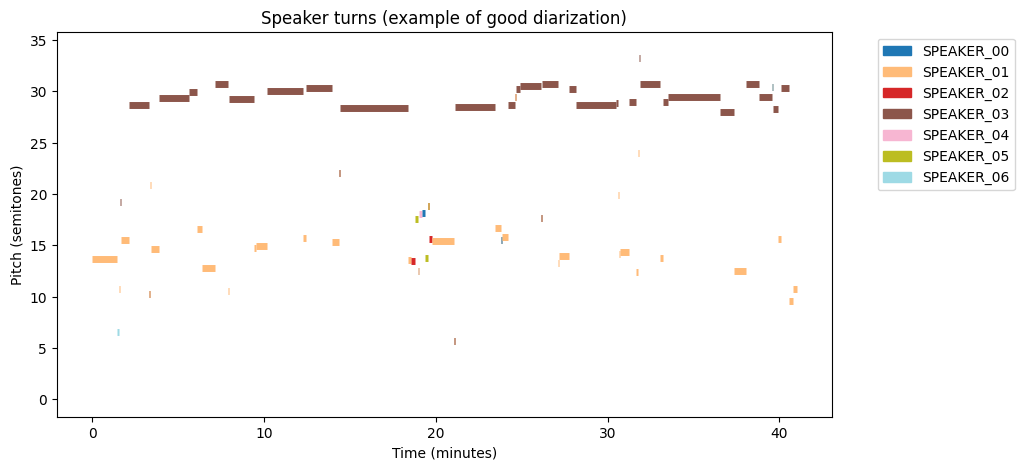

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

df = pd.DataFrame(rows, columns=column_names)

# Convert time from seconds to minutes
df["startTime"] /= 60
df["endTime"] /= 60

# Extract and sort unique speakers
unique_speakers = sorted(set(s for s_list in df["speaker"].str.split(", ") for s in s_list))

# Dynamically assign colors
cmap = cm.get_cmap("tab20", len(unique_speakers))
color_map = {speaker: cmap(i) for i, speaker in enumerate(unique_speakers)}

# Create plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each row with correct colors
for _, row in df.iterrows():
    speakers = row["speaker"].split(", ")
    for speaker in speakers:
        ax.hlines(
            y=row["F0semitoneFrom27_5Hz_sma3nzMean"],
            xmin=row["startTime"],
            xmax=row["endTime"],
            colors=color_map[speaker],
            linewidth=5
        )

# Create the legend with alphabetical order
handles = [mpatches.Patch(color=color_map[s], label=s) for s in unique_speakers]
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Pitch (semitones)")
ax.set_title("Speaker turns (example of good diarization)")

plt.show()

Apply binary and multi-class classifiers on speaker turns

Binary: 0 = action

In [12]:
import sqlite3
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and tokenizer
model_name = "ariannap22/collectiveaction_roberta_simplified_synthetic_weights"
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Connect to SQLite3 database
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

# Fetch rows from this episode
cursor.execute("SELECT rowid, turnText FROM speaker_turns WHERE mp3url = 'https://pdst.fm/e/chrt.fm/track/D33B1E/traffic.megaphone.fm/ADLM9924637739.mp3?updated=1651350594'")
rows = cursor.fetchall()

# Create a column for storing predictions (if it doesn't exist)
try:
    cursor.execute("ALTER TABLE speaker_turns ADD COLUMN binaryAction INTEGER")
except sqlite3.OperationalError:
    print("Column 'binaryAction' already exists.")

# Process texts and make predictions
for row_id, text in rows:
    if text.strip():  # Skip empty or blank texts
        # Tokenize the text
        inputs = tokenizer(
            [text],
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors="pt"
        ).to(device)

        # Perform prediction
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            probs = torch.nn.functional.softmax(logits, dim=-1)
            predicted_class_index = torch.argmax(probs, dim=-1).item()

        # Update the database with the prediction
        cursor.execute(
            "UPDATE speaker_turns SET binaryAction = ? WHERE rowid = ?",
            (predicted_class_index, row_id)
        )

# Commit changes and close connection
conn.commit()
conn.close()

print("Binary predictions added successfully.")

/mimer/NOBACKUP/groups/naiss2024-22-185/theodora/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Column 'binaryAction' already exists.
Binary predictions added successfully.


In [13]:
import sqlite3
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Connect to SQLite database and fetch the relevant data
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

query = '''
SELECT rowid, turnText
FROM speaker_turns
WHERE mp3url = "https://pdst.fm/e/chrt.fm/track/D33B1E/traffic.megaphone.fm/ADLM9924637739.mp3?updated=1651350594" AND binaryAction = 0
'''

cursor.execute(query)

# Fetch the turnText values along with the rowid
rows = cursor.fetchall()

# Set device to CPU or GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and tokenizer
model_name = "ariannap22/collectiveaction_roberta_synthetic_weights_layered"
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Extract the texts from the rows
texts = [row[1] for row in rows]
row_ids = [row[0] for row in rows]

# Tokenize the input text
inputs = tokenizer(
    texts,
    padding=True,  # Pad to the longest sequence in the batch
    truncation=True,  # Truncate sequences longer than the model's max length
    max_length=512,  # Adjust max length as needed
    return_tensors="pt"  # Return PyTorch tensors
).to(device)

# Perform prediction
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits  # Raw model outputs before softmax

# Convert logits to probabilities (optional)
probs = torch.nn.functional.softmax(logits, dim=-1)

# Get predicted class indices
predicted_class_indices = torch.argmax(probs, dim=-1)

# Update the database with the predicted class index in the 'multiAction' column
for row_id, idx in zip(row_ids, predicted_class_indices):
    cursor.execute('''
    UPDATE speaker_turns
    SET multiAction = ?
    WHERE rowid = ?
    ''', (idx.item(), row_id))

# Commit the changes to the database
conn.commit()

# Close the connection
conn.close()

print("Multi-class predictions added successfully.")

Multi-class predictions added successfully.


In [14]:
import sqlite3
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, pipeline

# Connect to SQLite database and fetch the relevant data
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

query = '''
SELECT rowid, turnText
FROM speaker_turns
WHERE mp3url = "https://pdst.fm/e/chrt.fm/track/D33B1E/traffic.megaphone.fm/ADLM9924637739.mp3?updated=1651350594" AND binaryAction = 0
'''

cursor.execute(query)

# Fetch the turnText values along with the rowid
rows = cursor.fetchall()

# Create a column for storing predictions (if it doesn't exist)
try:
    cursor.execute("ALTER TABLE speaker_turns ADD COLUMN multiActionLLM INTEGER")
except sqlite3.OperationalError:
    print("Column 'multiActionLLM' already exists.")

# Define levels of participation in collective action
dim_def = {'Problem-Solution': "The comment highlights an issue and possibly suggests a way to fix it, often naming those responsible.",
           'Call-to-Action': "The comment asks readers to take part in a specific activity, effort, or movement.",
           'Intention': "The commenter shares their own desire to do something or be involved in solving a particular issue.",
           'Execution': "The commenter is describing their personal experience taking direct actions towards a common goal."}

# Define the prompt
def generate_test_prompt6(data_point):
    return f"""
            You have the following knowledge about levels of participation in collective action that can be expressed in social media comments: {dim_def}. 
            
            ### Definitions and Criteria:
            **Collective Action Problem:** A present issue caused by human actions or decisions that affects a group and can be addressed through individual or collective efforts.

            **Participation in collective action**: A comment must clearly reference a collective action problem, social movement, or activism by meeting at least one of the levels in the list {dim_def.keys()}.

            Classify the following social media comment into one of the levels within the list {list(dim_def.keys())}. 

            ### Example of correct output format:
            text: xyz
            label: None
            
            Return the answer as the corresponding participation in collective action level label.

            text: {data_point}
            label: """.strip()

# Prepare the prompts
texts = [row[1] for row in rows]
texts_prompts = [generate_test_prompt6(text) for text in texts]

# Prepare datasets and load model
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=False,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype="float16",
)

model_dir = "ariannap22/collectiveaction_sft_annotated_only_v6_prompt_v6_p100_synthetic_balanced_more_layered"
model = AutoModelForCausalLM.from_pretrained(
    model_dir,
    device_map="auto",
    torch_dtype="float16",
    quantization_config=bnb_config, 
)

model.config.use_cache = False
model.config.pretraining_tp = 1

tokenizer = AutoTokenizer.from_pretrained(model_dir)
tokenizer.pad_token_id = tokenizer.eos_token_id

# Define prediction 
def predict(texts, model, tokenizer):
    y_pred = []
    answers = []
    categories = list(dim_def.keys())

    for i in range(len(texts)):
        prompt = texts[i]
        pipe = pipeline(task="text-generation", 
                        model=model, 
                        tokenizer=tokenizer, 
                        max_new_tokens=20, 
                        temperature=0.1)
        
        result = pipe(prompt)
        answer = result[0]['generated_text'].split("label:")[-1].strip()
        answers.append(answer)
        
        # Determine the predicted category
        for category in categories:
            if category.lower() in answer.lower():
                y_pred.append(category)
                break
        else:
            y_pred.append("error")
    
    return y_pred, answers

# Get predictions
y_pred, answer = predict(texts_prompts, model, tokenizer)

# Update the database with the predicted class index in the 'multiActionLLM' column
for row_id, pred in zip([row[0] for row in rows], y_pred):
    cursor.execute('''
    UPDATE speaker_turns
    SET multiActionLLM = ?
    WHERE rowid = ?
    ''', (pred, row_id))

# Commit the changes to the database
conn.commit()

# Close the connection
conn.close()

print("LLM Multi-class predictions added successfully.")

Column 'multiActionLLM' already exists.


Loading checkpoint shards: 100%|██████████| 4/4 [02:31<00:00, 37.85s/it]
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


LLM Multi-class predictions added successfully.


All identified as "Problem-Solution" by the BERT model. Two identified as "Call-to-Action" by LLM.

In [15]:
import sqlite3
from tabulate import tabulate

# Connect to the database
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

query = f'''
SELECT *
FROM speaker_turns
WHERE mp3url = "https://pdst.fm/e/chrt.fm/track/D33B1E/traffic.megaphone.fm/ADLM9924637739.mp3?updated=1651350594" AND binaryAction = 0
'''

cursor.execute(query)

# Fetch all rows from the result
rows = cursor.fetchall()

# Get column names from the table
column_names = [description[0] for description in cursor.description]

# Print the table using tabulate
print(tabulate(rows, headers=column_names, tablefmt="pretty"))

# Close the cursor and the connection
cursor.close()
conn.close()

+----------------+----------------+----------------+----------------+---------------------------------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Build network to track responses to action statements

Look at prosodic features of action statements

### KEYWORD-FILTERED DATASET: take out trash from speaker turns

In [6]:
import pandas as pd
blm_dic = pd.read_csv('../data/racism_list.csv', header=None)
blm_dic.columns = ['keyword']
keywords = blm_dic['keyword'].tolist()  
blm_dic

,keyword
0,racism
1,racial justice
2,police brutality
3,police violence
4,black people
5,black person
6,black lives matter


In [10]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

try:
    # Build the dynamic WHERE clause based on the keywords
    where_clause = " OR ".join([f"LOWER(transcript) LIKE '%{keyword.lower()}%'" for keyword in keywords])
    query = f"SELECT COUNT(*) FROM podcast_episodes WHERE {where_clause}"

    # Execute the query
    cursor.execute(query)
    count = cursor.fetchone()[0]

    # Print the count
    print(f"Number of podcast episodes containing keywords: {count}")

except sqlite3.Error as e:
    print(f"An error occurred: {e}")

finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()

Number of podcast episodes containing keywords: 142141


#### Episode duration

In [18]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('../data/data.db')

try:
    # Build the dynamic WHERE clause based on the keywords
    where_clause = " OR ".join([f"LOWER(transcript) LIKE '%{keyword.lower()}%'" for keyword in keywords])
    query = f"SELECT durationSeconds FROM podcast_episodes WHERE {where_clause}"

    # Execute the query
    cursor = conn.cursor()
    cursor.execute(query)
    results = cursor.fetchall()

    if not results:
        print("No podcast episodes matched the keywords.")
    else:
        # Extract durations and filter out non-numeric values
        durations = [row[0] for row in results if row[0] is not None and isinstance(row[0], (int, float))]

        if durations:
            # Summary statistics
            count = len(durations)
            mean_duration = sum(durations) / count
            min_duration = min(durations)
            max_duration = max(durations)
            std_duration = (sum((x - mean_duration) ** 2 for x in durations) / count) ** 0.5

            # Calculate median
            sorted_durations = sorted(durations)
            mid = count // 2
            if count % 2 == 0:
                median_duration = (sorted_durations[mid - 1] + sorted_durations[mid]) / 2
            else:
                median_duration = sorted_durations[mid]

            print("Summary Statistics for Podcast Episode Durations:")
            print(f"Mean Duration (seconds): {mean_duration:.2f}")
            print(f"Median Duration (seconds): {median_duration:.2f}")
            print(f"Min Duration (seconds): {min_duration}")
            print(f"Max Duration (seconds): {max_duration}")
            print(f"Standard Deviation (seconds): {std_duration:.2f}")
        else:
            print("No valid duration data available.")

except sqlite3.Error as e:
    print(f"An error occurred: {e}")

finally:
    # Close the connection
    conn.close()

Summary Statistics for Podcast Episode Durations:
Mean Duration (seconds): 3107.53
Median Duration (seconds): 2803.00
Min Duration (seconds): 0.0
Max Duration (seconds): 525013.0
Standard Deviation (seconds): 3593.53


In [2]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('../data/data.db')

try:
    # Build the dynamic WHERE clause based on the keywords
    where_clause = " OR ".join([f"LOWER(transcript) LIKE '%{keyword.lower()}%'" for keyword in keywords])
    query = f"SELECT durationSeconds FROM podcast_episodes WHERE {where_clause}"

    # Execute the query
    cursor = conn.cursor()
    cursor.execute(query)
    results = cursor.fetchall()

    if not results:
        print("No podcast episodes matched the keywords.")
    else:
        # Extract durations and filter out non-numeric values
        durations = [row[0] for row in results if row[0] is not None and isinstance(row[0], (int, float))]

        if durations:
            # Count episodes longer than 4 hours (14400 seconds)
            long_episodes_count = sum(1 for duration in durations if duration > 14400)

            print(f"Number of episodes longer than 4 hours: {long_episodes_count}")
        else:
            print("No valid duration data available.")

except sqlite3.Error as e:
    print(f"An error occurred: {e}")

finally:
    # Close the connection
    conn.close()

Number of episodes longer than 4 hours: 140


What is too short of an episode? What is too long?

In episodes with identified hosts and guests (speaker_n), assign any multi-speaker turns to the main speakers. If more main speakers in one turn, assign to the first in the list (the one that was already talking). Do not sort speaker lists alphabetically! If multiple consecutive short (what is short?) turns from the same speaker, concatenate (mean of mean prosodic features?)

#### Number of speakers

In the keyword-filtered episode set, how many episodes was diarization performed on?

In [4]:
import sqlite3
import pandas as pd

# Assume blm_dic is already defined and contains the keyword list
keywords = blm_dic['keyword'].tolist()

# Connect to the database
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

try:
    # Build the dynamic WHERE clause based on the keywords
    where_clause = " OR ".join([f"transcript LIKE '%{keyword}%'" for keyword in keywords])
    
    # Query to filter podcast_episodes by keywords and get unique mp3urls
    query_episodes = f"SELECT DISTINCT mp3url FROM podcast_episodes WHERE {where_clause}"
    cursor.execute(query_episodes)
    filtered_mp3urls = [row[0] for row in cursor.fetchall()]

    # Query to get all mp3urls from speaker_turns
    query_speaker_turns = "SELECT DISTINCT mp3url FROM speaker_turns"
    cursor.execute(query_speaker_turns)
    speaker_turns_mp3urls = {row[0] for row in cursor.fetchall()}

    # Find the intersection of mp3urls
    common_mp3urls = set(filtered_mp3urls) & speaker_turns_mp3urls

    # Print the count of unique matching mp3urls
    print(f"Number of unique matching mp3urls between keyword-filtered episodes and speaker turns: {len(common_mp3urls)}")

except sqlite3.Error as e:
    print(f"An error occurred: {e}")

finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()

Number of unique matching mp3urls between keyword-filtered episodes and speaker turns: 47333


Add a column that indicates whether diarization was performed or not.

V2 takes chunks of 1000 episodes.

In [3]:
# import sqlite3

# # Assume common_mp3urls is already defined as a set
# conn = sqlite3.connect('../data/data.db')
# cursor = conn.cursor()

# try:
#     # Add a new column "diarized" to the podcast_episodes table (if not exists)
#     #cursor.execute("ALTER TABLE podcast_episodes ADD COLUMN diarized INTEGER DEFAULT 0")
    
#     # Chunk the common_mp3urls into batches for more efficient updating
#     batch_size = 1000
#     common_mp3urls_list = list(common_mp3urls)  # Convert set to list
    
#     # Update in batches
#     n = 0
#     for i in range(0, len(common_mp3urls_list), batch_size):
#         batch = common_mp3urls_list[i:i + batch_size]
        
#         # Use the "IN" clause to update multiple rows at once
#         placeholders = ",".join(["?"] * len(batch))
#         cursor.execute(f"""
#             UPDATE podcast_episodes 
#             SET diarized = 1 
#             WHERE mp3url IN ({placeholders})
#         """, tuple(batch))
#         n = n + 1
#         print("Batch {n} complete")

#         # Commit after each batch
#         conn.commit()

#     print("Diarized column updated successfully.")

# except sqlite3.Error as e:
#     print(f"An error occurred: {e}")

# finally:
#     cursor.close()
#     conn.close()

Add a column that indicates if the episode has badDiarization (if totalSpLabels != numMainSpeakers)

In [2]:
# import sqlite3

# # Connect to the database
# conn = sqlite3.connect('../data/data.db')
# cursor = conn.cursor()

# # # Add the new column `badDiarization` (if it doesn't exist already)
# # cursor.execute('''
# #     ALTER TABLE podcast_episodes
# #     ADD COLUMN badDiarization INTEGER;
# # ''')

# # Update the `badDiarization` column based on the condition
# cursor.execute('''
#     UPDATE podcast_episodes
#     SET badDiarization = CASE
#         WHEN totalSpLabels = numMainSpeakers THEN 0
#         ELSE 1
#     END
# ''')
# #WHERE diarized = 1;

# # Commit the changes
# conn.commit()

# # Close the cursor and connection
# cursor.close()
# conn.close()

Check new diarization columns. Note: if diarization = 0, badDiarization = NULL

In [5]:
import sqlite3
from tabulate import tabulate

# Connect to the database
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

keywords = blm_dic['keyword'].tolist() 

# Build the WHERE clause dynamically based on the keywords
where_clause = " OR ".join([f"transcript LIKE '%{keyword}%'" for keyword in keywords])

query = f'''
SELECT diarized, badDiarization, numMainSpeakers, totalSpLabels
FROM podcast_episodes
WHERE diarized = 1 AND ({where_clause})
LIMIT 5;
'''

cursor.execute(query)

# Fetch all rows from the result
rows = cursor.fetchall()

# Get column names from the table
column_names = [description[0] for description in cursor.description]

# Print the table using tabulate
print(tabulate(rows, headers=column_names, tablefmt="pretty"))

# Close the cursor and the connection
cursor.close()
conn.close()

+----------+----------------+-----------------+---------------+
| diarized | badDiarization | numMainSpeakers | totalSpLabels |
+----------+----------------+-----------------+---------------+
|    1     |       1        |       3.0       |      4.0      |
|    1     |       0        |       3.0       |      3.0      |
|    1     |       1        |       1.0       |      3.0      |
|    1     |       1        |       1.0       |      2.0      |
|    1     |       1        |       2.0       |      7.0      |
+----------+----------------+-----------------+---------------+


In the keyword-filtered good-diarization episode set, how many episodes have good diarization quality?

In [3]:
import sqlite3

# Database file path
db_path = "../data/data.db"

# Keywords to search in the transcript
where_clause = " OR ".join([f"LOWER(transcript) LIKE '%{keyword.lower()}%'" for keyword in keywords])

# SQL query to count matching rows
query = f"""
SELECT COUNT(*) 
FROM podcast_episodes 
WHERE ({where_clause}) 
AND badDiarization = 0;
"""

# Connect to the database
with sqlite3.connect(db_path) as conn:
    cursor = conn.cursor()
    cursor.execute(query)
    count = cursor.fetchone()[0]

print(f"Number of episodes with good diarization quality: {count}")

Number of episodes with good diarization quality: 10496


In [ ]:
import sqlite3
import matplotlib.pyplot as plt

# Establish database connection
query = """
SELECT diarized, numMainSpeakers, totalSpLabels
FROM podcast_episodes
WHERE diarized = 1 AND ({where_clause})
"""

connection = sqlite3.connect(db_path)
cursor = connection.cursor()

# Execute query and fetch data
cursor.execute(query)
results = cursor.fetchall()

# Close the connection
cursor.close()
connection.close()

# Extract columns from query results
num_main_speakers = [row[1] for row in results]
total_sp_labels = [row[2] for row in results]

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(num_main_speakers, total_sp_labels, color="skyblue", edgecolor="black")
plt.title("Number of Main Speakers vs Total Speaker Labels")
plt.xlabel("Number of Main Speakers")
plt.ylabel("Total Speaker Labels")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Count how many episodes with X number of speakers (good diarization)

In [14]:
import sqlite3

# Database file path
db_path = "../data/data.db"

# Keywords to search in the transcript
where_clause = " OR ".join([f"LOWER(transcript) LIKE '%{keyword.lower()}%'" for keyword in keywords])

# SQL query
query = f"""
SELECT numMainSpeakers, COUNT(*) AS count
FROM podcast_episodes
WHERE ({where_clause})
AND badDiarization = 0
GROUP BY numMainSpeakers;
"""

# Connect to the database
with sqlite3.connect(db_path) as conn:
    cursor = conn.cursor()
    cursor.execute(query)
    results = cursor.fetchall()

# Print results
print("Number of speakers for good diarization episodes:")
for row in results:
    print(f"numMainSpeakers: {row[0]}, count: {row[1]}")

Number of speakers for good diarization episodes:
numMainSpeakers: 1.0, count: 5199
numMainSpeakers: 2.0, count: 3795
numMainSpeakers: 3.0, count: 995
numMainSpeakers: 4.0, count: 329
numMainSpeakers: 5.0, count: 111
numMainSpeakers: 6.0, count: 45
numMainSpeakers: 7.0, count: 19
numMainSpeakers: 8.0, count: 2
numMainSpeakers: 10.0, count: 1


In [15]:
import sqlite3

# Database file path
db_path = "../data/data.db"

# Keywords to search in the transcript
where_clause = " OR ".join([f"LOWER(transcript) LIKE '%{keyword.lower()}%'" for keyword in keywords])

# SQL query
query = f"""
SELECT numMainSpeakers, COUNT(*) AS count
FROM podcast_episodes
WHERE ({where_clause})
AND diarized = 1
GROUP BY numMainSpeakers;
"""

# Connect to the database
with sqlite3.connect(db_path) as conn:
    cursor = conn.cursor()
    cursor.execute(query)
    results = cursor.fetchall()

# Print results
print("Number of speakers for all diarization episodes:")
for row in results:
    print(f"numMainSpeakers: {row[0]}, count: {row[1]}")

Number of speakers for all diarization episodes:
numMainSpeakers: 1.0, count: 12948
numMainSpeakers: 2.0, count: 19672
numMainSpeakers: 3.0, count: 8645
numMainSpeakers: 4.0, count: 3697
numMainSpeakers: 5.0, count: 1375
numMainSpeakers: 6.0, count: 563
numMainSpeakers: 7.0, count: 237
numMainSpeakers: 8.0, count: 139
numMainSpeakers: 9.0, count: 44
numMainSpeakers: 10.0, count: 12
numMainSpeakers: 11.0, count: 1


Testing the 10-speaker "good diarization" episode to check diarization quality. From the episode description, the number of speakers is correct.

In [16]:
import sqlite3
from tabulate import tabulate

# Connect to the database
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

keywords = blm_dic['keyword'].tolist() 

# Build the WHERE clause dynamically based on the keywords
where_clause = " OR ".join([f"transcript LIKE '%{keyword}%'" for keyword in keywords])

query = f'''
SELECT podTitle, epTitle, mp3url
FROM podcast_episodes
WHERE badDiarization = 0 AND ({where_clause}) AND numMainSpeakers = 10
LIMIT 5;
'''

cursor.execute(query)

# Fetch all rows from the result
rows = cursor.fetchall()

# Get column names from the table
column_names = [description[0] for description in cursor.description]

# Print the table using tabulate
print(tabulate(rows, headers=column_names, tablefmt="pretty"))

# Close the cursor and the connection
cursor.close()
conn.close()

+--------------------------+-------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------+
|         podTitle         |                        epTitle                        |                                                                           mp3url                                                                           |
+--------------------------+-------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Improv Comedy Connection | COVID-19 Summit -- The Globalization of Improv Part 2 | https://anchor.fm/s/debdff4/podcast/play/13465947/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fproduction%2F2020-4-8%2F71293346-48000-2-f839edbfc229e.mp3 |
+--------------------------+----

In [19]:
# import sqlite3

# # Connect to the database
# conn = sqlite3.connect('../data/data.db')
# cursor = conn.cursor()

# try:
#     # Query to select specific columns from the speaker_turns table
#     query = '''
#     SELECT turnCount, speaker, turnText
#     FROM speaker_turns
#     WHERE mp3url = "https://anchor.fm/s/debdff4/podcast/play/13465947/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fproduction%2F2020-4-8%2F71293346-48000-2-f839edbfc229e.mp3"
#     '''

#     # Execute the query
#     cursor.execute(query)

#     # Fetch all rows
#     rows = cursor.fetchall()

#     # Write results to a text file
#     with open("../data/10_speaker_transcript.txt", "w", encoding="utf-8") as file:
#         # Write each row to the file
#         for row in rows:
#             line = " | ".join(str(value) for value in row)
#             file.write(line + "\n")

#     print("Results successfully written to ../data/10_speaker_transcript.txt")

# finally:
#     # Ensure resources are cleaned up
#     cursor.close()
#     conn.close()

Results successfully written to ../data/10_speaker_transcript.txt


In [20]:
import sqlite3
from tabulate import tabulate

# Connect to the database
conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

query = f'''
SELECT *
FROM speaker_turns
WHERE mp3url = "https://anchor.fm/s/debdff4/podcast/play/13465947/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fproduction%2F2020-4-8%2F71293346-48000-2-f839edbfc229e.mp3"
'''

cursor.execute(query)

# Fetch all rows from the result
rows = cursor.fetchall()

# Get column names from the table
column_names = [description[0] for description in cursor.description]

# Print the table using tabulate
print(tabulate(rows, headers=column_names, tablefmt="pretty"))

# Close the cursor and the connection
cursor.close()
conn.close()

+----------------+----------------+----------------+----------------+---------------------------------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/local/tmp.3550172/ipykernel_3815555/2795682670.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(unique_speakers))


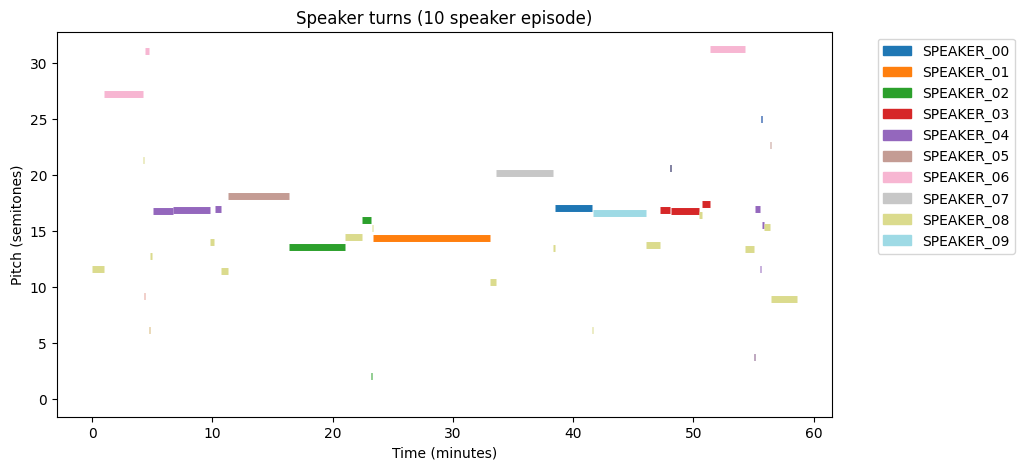

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

df = pd.DataFrame(rows, columns=column_names)

# Convert time from seconds to minutes
df["startTime"] /= 60
df["endTime"] /= 60

# Extract and sort unique speakers
unique_speakers = sorted(set(s for s_list in df["speaker"].str.split(", ") for s in s_list))

# Dynamically assign colors
cmap = cm.get_cmap("tab20", len(unique_speakers))
color_map = {speaker: cmap(i) for i, speaker in enumerate(unique_speakers)}

# Create plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each row with correct colors
for _, row in df.iterrows():
    speakers = row["speaker"].split(", ")
    for speaker in speakers:
        ax.hlines(
            y=row["F0semitoneFrom27_5Hz_sma3nzMean"],
            xmin=row["startTime"],
            xmax=row["endTime"],
            colors=color_map[speaker],
            linewidth=5
        )

# Create the legend with alphabetical order
handles = [mpatches.Patch(color=color_map[s], label=s) for s in unique_speakers]
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Pitch (semitones)")
ax.set_title("Speaker turns (10 speaker episode)")

plt.show()

Test categorical homogeneity provided by vocal characteristics: average fundamental frequency (F0) values (in semitones above A0) by category

In [6]:
import sqlite3
import pandas as pd
from scipy.stats import levene

# Connect to the database
conn = sqlite3.connect('../data/data.db')

# Query to get the relevant data with a JOIN on mp3url
query = '''
SELECT pe.category1, st.F0semitoneFrom27_5Hz_sma3nzMean
FROM podcast_episodes pe
JOIN speaker_turns st ON pe.mp3url = st.mp3url
WHERE st.F0semitoneFrom27_5Hz_sma3nzMean IS NOT NULL;
'''

# Execute the query
cursor = conn.cursor()
cursor.execute(query)

# Fetch all rows from the query result
rows = cursor.fetchall()

# Close the connection
conn.close()

# Load the result into a pandas DataFrame
df = pd.DataFrame(rows, columns=["category1", "F0semitoneFrom27_5Hz_sma3nzMean"])

# Group data by category1
groups = [group["F0semitoneFrom27_5Hz_sma3nzMean"].values for _, group in df.groupby("category1")]

# Perform Levene's test
stat, p_value = levene(*groups)

print(f"Levene’s test statistic: {stat}, p-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("The variances are significantly different (reject homogeneity assumption).")
else:
    print("The variances are not significantly different (homogeneity assumed).")

Levene’s test statistic: 6697.499533051413, p-value: 0.0
The variances are significantly different (reject homogeneity assumption).


In [16]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Connect to the database
conn = sqlite3.connect('../data/../data/data.db')
cursor = conn.cursor()

# Build the WHERE clause
where_clause = " OR ".join([f"transcript LIKE '%{keyword}%'" for keyword in keywords])

# Format the query string properly
query = f'''
SELECT pe.category1, st.F0semitoneFrom27_5Hz_sma3nzMean
FROM podcast_episodes pe
JOIN speaker_turns st ON pe.mp3url = st.mp3url
WHERE pe.diarized = 1 AND ({where_clause}) AND st.F0semitoneFrom27_5Hz_sma3nzMean IS NOT NULL;
'''

# Execute the query
cursor.execute(query)
data = cursor.fetchall()

# Close the connection
conn.close()

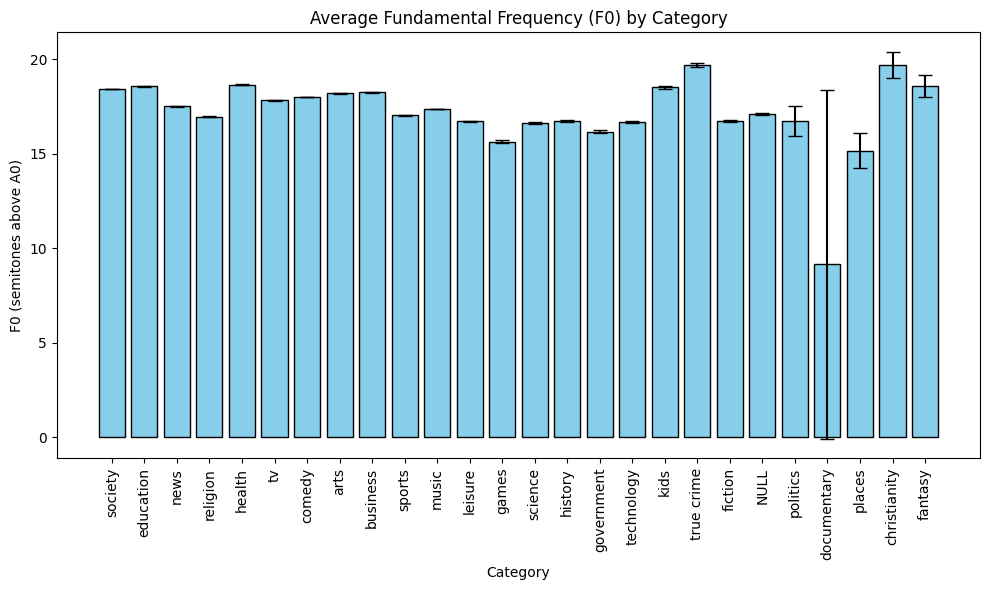

In [11]:
# Group the data by category
categories = {}
for category, f0 in data:
    if category not in categories:
        categories[category] = []
    categories[category].append(f0)

# Prepare lists for plotting
category_names = []
means = []
cis = []

# Compute the mean, SEM, and 95% CI for each category
for category, f0_values in categories.items():
    category_names.append(category)
    mean_f0 = np.mean(f0_values)
    std_f0 = np.std(f0_values, ddof=1)
    n = len(f0_values)
    
    # Standard error of the mean
    sem_f0 = std_f0 / np.sqrt(n)
    
    # 95% confidence interval (using the t-distribution)
    confidence_level = 0.95
    degrees_freedom = n - 1
    critical_value = t.ppf((1 + confidence_level) / 2, degrees_freedom)
    ci95 = critical_value * sem_f0
    
    # Store the values
    means.append(mean_f0)
    cis.append(ci95)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(category_names, means, yerr=cis, capsize=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Average Fundamental Frequency (F0) by Category")
plt.ylabel("F0 (semitones above A0)")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()